# Steady state anvil fraction

Exploring changes to thin anvil fraction in an idealised model, using a steady equation for the anvil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from ipywidgets import *
%matplotlib inline

Define some default values:

In [2]:
from collections import namedtuple
Defaults = namedtuple("Defaults", ["r_0", "D", "w", "q_0", "alpha"])
defaults = Defaults(r_0=5e3, D=2e3, w=5, q_0=0.1, alpha=1/3600)

x_bounds = [0, 1e5]
y_bounds = [0, 8]
x = np.linspace(np.maximum(x_bounds[0], 1), x_bounds[1], 1000)

Define functions:

In [3]:
def v(r, r_0=defaults.r_0, D=defaults.D, w=defaults.w):
    return np.clip(
        (w * r_0**2) / (2 * D * r), 0, (w * r_0**2) / (2 * D * r_0)
    )

def t(r, r_0=defaults.r_0, D=defaults.D, w=defaults.w):
    return np.maximum(D / (w * r_0**2) * (r**2 - r_0**2), 0)

# Using exponential model
def q(r, r_0=defaults.r_0, D=defaults.D, w=defaults.w, q_0=defaults.q_0, alpha=defaults.alpha):
    return q_0 * np.exp(- alpha * t(r, r_0, D, w))

def A(threshold, r_0=defaults.r_0, D=defaults.D, w=defaults.w, q_0=defaults.q_0, alpha=defaults.alpha):
    return np.pi * (r_0**2 -  (w * r_0**2) / (D * alpha)* np.log(threshold / (q_0 * D)))

In [4]:
np.log(100 / (0.1 * 2e3))

np.float64(-0.6931471805599453)

In [5]:
(5 * 5e3**2) / (2e3 * 1/3600)

225000000.0

Text(0, 0.5, '$v_r$ [$\\mathrm{m\\,s^{-1}}$]')

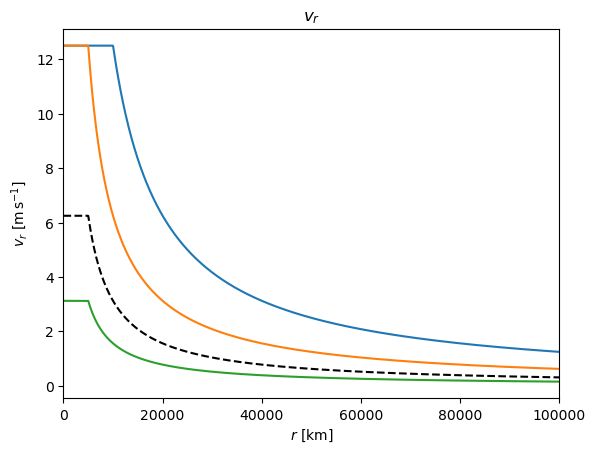

In [6]:
plt.plot(x, v(x), "k--")
plt.plot(x, v(x, r_0=1e4))
plt.plot(x, v(x, w=10))
plt.plot(x, v(x, D=4e3))
plt.xlim(x_bounds)
# plt.ylim(y_bounds)
plt.title(r"$v_r$")
plt.xlabel(r"$r$ [km]")
plt.ylabel(r"$v_r$ [$\mathrm{m\,s^{-1}}$]")

Text(0, 0.5, '$t_r$ [s]')

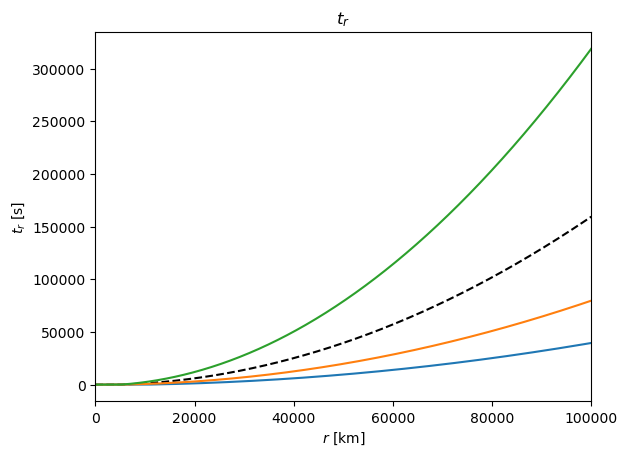

In [7]:
plt.plot(x, t(x), "k--")
plt.plot(x, t(x, r_0=1e4))
plt.plot(x, t(x, w=10))
plt.plot(x, t(x, D=4e3))
plt.xlim(x_bounds)
# plt.ylim(y_bounds)
plt.title(r"$t_r$")
plt.xlabel(r"$r$ [km]")
plt.ylabel(r"$t_r$ [s]")

Text(0, 0.5, '$q_r$ [$\\mathrm{g\\,km^{-1}}$]')

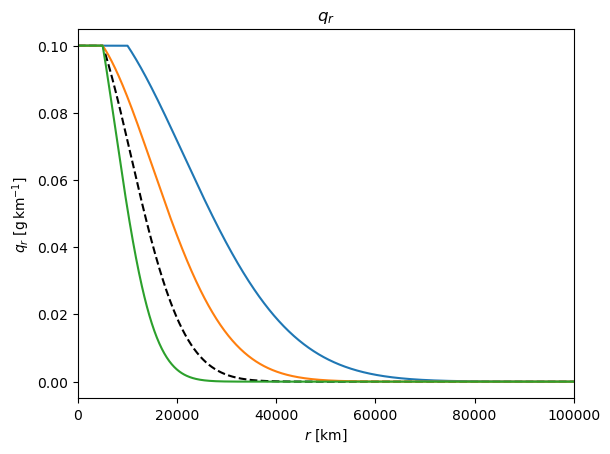

In [8]:
plt.plot(x, q(x), "k--")
plt.plot(x, q(x, r_0=1e4))
plt.plot(x, q(x, w=10))
plt.plot(x, q(x, D=4e3))
plt.xlim(x_bounds)
# plt.ylim(y_bounds)
plt.title(r"$q_r$")
plt.xlabel(r"$r$ [km]")
plt.ylabel(r"$q_r$ [$\mathrm{g\,km^{-1}}$]")

Text(0.5, 0, '$1 / alpha$ [s]')

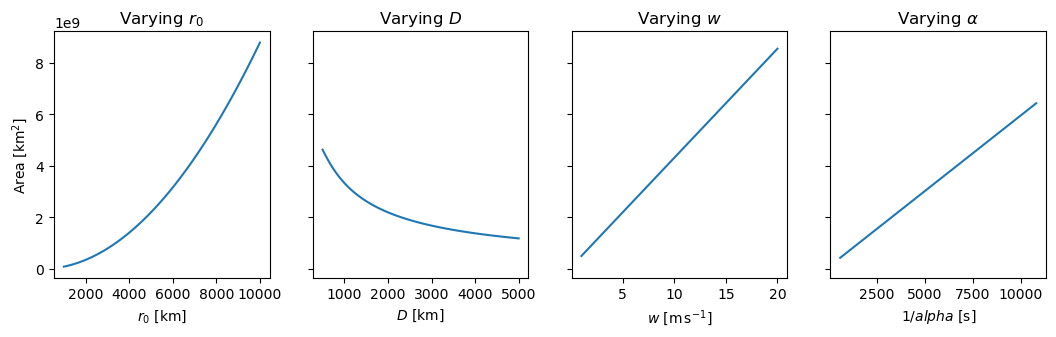

In [9]:
threshold = 10

fig, axes = plt.subplots(1, 4, figsize=(12.8,3.2), sharey=True
                        )
r_0_space = np.linspace(1e3, 1e4, 100)
axes[0].plot(r_0_space, A(threshold, r_0=r_0_space))
axes[0].set_title(r"Varying $r_0$")
axes[0].set_xlabel(r"$r_0$ [km]")
axes[0].set_ylabel(r"Area [$\mathrm{km^2}$]")

D_space = np.linspace(5e2, 5e3, 100)
axes[1].plot(D_space, A(threshold, D=D_space))
axes[1].set_title(r"Varying $D$")
axes[1].set_xlabel(r"$D$ [km]")

w_space = np.linspace(1, 20, 100)
axes[2].plot(w_space, A(threshold, w=w_space))
axes[2].set_title(r"Varying $w$")
axes[2].set_xlabel(r"$w$ [$\mathrm{m\,s^{-1}}$]")

alpha_space = np.linspace(1/600, 1/10800, 100)
axes[3].plot(1/alpha_space, A(threshold, alpha=alpha_space))
axes[3].set_title(r"Varying $\alpha$")
axes[3].set_xlabel(r"$1 / alpha$ [s]")


Text(0.5, 0, '$1 / alpha$ [s]')

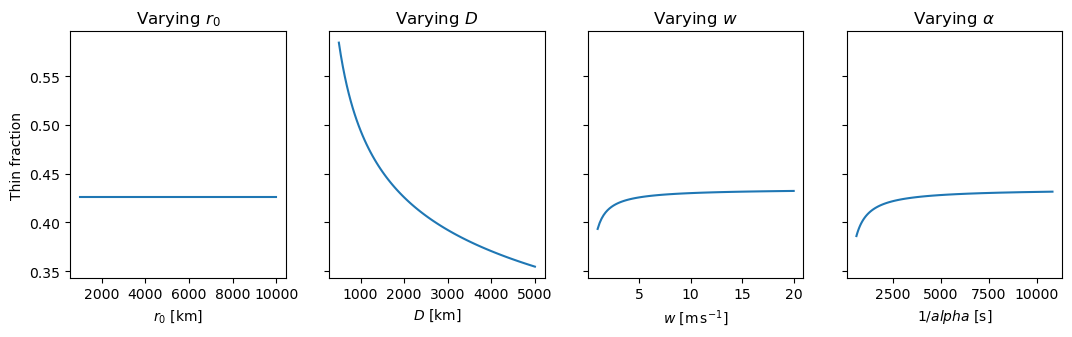

In [16]:
threshold_a = 10
threshold_b = 1

fig, axes = plt.subplots(1, 4, figsize=(12.8,3.2), sharey=True)
axes[0].plot(r_0_space, 1 - A(threshold_a, r_0=r_0_space) / A(threshold_b, r_0=r_0_space))
axes[0].set_title(r"Varying $r_0$")
axes[0].set_xlabel(r"$r_0$ [km]")
axes[0].set_ylabel(r"Thin fraction")

D_space = np.linspace(5e2, 5e3, 100)
axes[1].plot(D_space, 1 - A(threshold_a, D=D_space) / A(threshold_b, D=D_space))
axes[1].set_title(r"Varying $D$")
axes[1].set_xlabel(r"$D$ [km]")

w_space = np.linspace(1, 20, 100)
axes[2].plot(w_space, 1 - A(threshold_a, w=w_space) / A(threshold_b, w=w_space))
axes[2].set_title(r"Varying $w$")
axes[2].set_xlabel(r"$w$ [$\mathrm{m\,s^{-1}}$]")

alpha_space = np.linspace(1/600, 1/10800, 100)
axes[3].plot(1/alpha_space, 1 - A(threshold_a, alpha=alpha_space) / A(threshold_b, alpha=alpha_space))
axes[3].set_title(r"Varying $\alpha$")
axes[3].set_xlabel(r"$1 / alpha$ [s]")
